# AQI PREDICTION MODEL USING PYTHON MACHIINE LEANRING 

#### PM2.5 PM10
#### NO, NO2
#### NH3 -Ammonia
#### CO
#### So2
#### O3
#### Benzene
#### Toluene
#### Xylene

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
df= pd.read_csv('air_quality.csv')

In [3]:
df.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [4]:
df


,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,Visakhapatnam,2020-06-27,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0,Good
29527,Visakhapatnam,2020-06-28,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0,Satisfactory
29528,Visakhapatnam,2020-06-29,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0,Satisfactory
29529,Visakhapatnam,2020-06-30,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,0.00,54.0,Satisfactory


In [5]:
df.describe

<bound method NDFrame.describe of                 City        Date  PM2.5   PM10     NO    NO2    NOx    NH3  \
0          Ahmedabad  2015-01-01    NaN    NaN   0.92  18.22  17.15    NaN   
1          Ahmedabad  2015-01-02    NaN    NaN   0.97  15.69  16.46    NaN   
2          Ahmedabad  2015-01-03    NaN    NaN  17.40  19.30  29.70    NaN   
3          Ahmedabad  2015-01-04    NaN    NaN   1.70  18.48  17.97    NaN   
4          Ahmedabad  2015-01-05    NaN    NaN  22.10  21.42  37.76    NaN   
...              ...         ...    ...    ...    ...    ...    ...    ...   
29526  Visakhapatnam  2020-06-27  15.02  50.94   7.68  25.06  19.54  12.47   
29527  Visakhapatnam  2020-06-28  24.38  74.09   3.42  26.06  16.53  11.99   
29528  Visakhapatnam  2020-06-29  22.91  65.73   3.45  29.53  18.33  10.71   
29529  Visakhapatnam  2020-06-30  16.64  49.97   4.05  29.26  18.80  10.03   
29530  Visakhapatnam  2020-07-01  15.00  66.00   0.40  26.85  14.05   5.20   

          CO    SO2      O3  

In [ ]:
df.shape  #shape- rows and columns 

(29531, 16)

In [ ]:
df.info()  #information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


In [8]:
#percentage of the null values
null_values_percentage= (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending=False)
null_values_percentage

Xylene        61.322001
PM10          37.723071
NH3           34.973418
Toluene       27.229014
Benzene       19.041008
AQI           15.851139
AQI_Bucket    15.851139
PM2.5         15.570079
NOx           14.171549
O3            13.619586
SO2           13.050692
NO2           12.139785
NO            12.129626
CO             6.972334
Date           0.000000
City           0.000000
dtype: float64

### key considerations:
- Xylene has the highest percentage of missing values - 61.32%
- PM10 and NH3 37% - 34%
- 


### Data cleaniing and handling missing values


In [9]:
df.duplicated().sum()

np.int64(0)

In [10]:
df.isnull().sum()   # there is the alot of null values 

City              0
Date              0
PM2.5          4598
PM10          11140
NO             3582
NO2            3585
NOx            4185
NH3           10328
CO             2059
SO2            3854
O3             4022
Benzene        5623
Toluene        8041
Xylene        18109
AQI            4681
AQI_Bucket     4681
dtype: int64

handling all the missing values 

In [11]:
df['AQI'].fillna(df['AQI'].mean(), inplace=True) # Replace missing values with the mean of AQI

In [12]:
df['PM2.5'].fillna(df['PM2.5'].mean(), inplace=True) # Replace missing values with mean

In [13]:
df['PM10'].fillna(df['PM10'].mean(), inplace=True) # replace NaN with mean

In [14]:
df['AQI_Bucket'].fillna(method='ffill', inplace=True) # forward fill missing values

In [15]:
df['Benzene'].fillna(df['Benzene'].mean(),inplace=True)    #replace benezene null values 

In [16]:
df['CO'].fillna(df['CO'].mean(),inplace=True) # fill missing values with mean

In [17]:
df['NH3'].fillna(df['NH3'].mean(),inplace=True) #replace missing values with mean

In [18]:
df['NO'].fillna(df['NO'].mean(),inplace=True) #replace missing values with mean

In [19]:
df['NO2'].fillna(df['NO2'].mean(),inplace=True) #replace missing values with mean

In [20]:
df['NOx'].fillna(df['NOx'].mean(),inplace=True) #replace missing values with mean

In [21]:
df['O3'].fillna(df['O3'].mean(),inplace=True)  #replace missing values with mean

In [22]:
df['PM10'].fillna(df['PM10'].mean(),inplace=True)   #replace missing values with mean

In [23]:
df['SO2'].fillna(df['SO2'].mean(),inplace=True)   #replace missing values with mean

In [24]:
df['Toluene'].fillna(df['Toluene'].mean(),inplace=True)   #replace missing values with mean

In [25]:
df['Xylene'].fillna(df['Xylene'].mean(),inplace=True)  #replace missing values with mean

In [26]:
df['AQI_Bucket'].fillna(method='bfill',inplace=True)  # backward fill values 

In [27]:
df.isnull().sum()

City          0
Date          0
PM2.5         0
PM10          0
NO            0
NO2           0
NOx           0
NH3           0
CO            0
SO2           0
O3            0
Benzene       0
Toluene       0
Xylene        0
AQI           0
AQI_Bucket    0
dtype: int64

In [28]:
df   # data cleaned

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,67.450578,118.127103,0.92,18.22,17.15,23.483476,0.92,27.64,133.36,0.00000,0.020000,0.000000,166.463581,Poor
1,Ahmedabad,2015-01-02,67.450578,118.127103,0.97,15.69,16.46,23.483476,0.97,24.55,34.06,3.68000,5.500000,3.770000,166.463581,Poor
2,Ahmedabad,2015-01-03,67.450578,118.127103,17.40,19.30,29.70,23.483476,17.40,29.07,30.70,6.80000,16.400000,2.250000,166.463581,Poor
3,Ahmedabad,2015-01-04,67.450578,118.127103,1.70,18.48,17.97,23.483476,1.70,18.59,36.08,4.43000,10.140000,1.000000,166.463581,Poor
4,Ahmedabad,2015-01-05,67.450578,118.127103,22.10,21.42,37.76,23.483476,22.10,39.33,39.31,7.01000,18.890000,2.780000,166.463581,Poor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,Visakhapatnam,2020-06-27,15.020000,50.940000,7.68,25.06,19.54,12.470000,0.47,8.55,23.30,2.24000,12.070000,0.730000,41.000000,Good
29527,Visakhapatnam,2020-06-28,24.380000,74.090000,3.42,26.06,16.53,11.990000,0.52,12.72,30.14,0.74000,2.210000,0.380000,70.000000,Satisfactory
29528,Visakhapatnam,2020-06-29,22.910000,65.730000,3.45,29.53,18.33,10.710000,0.48,8.42,30.96,0.01000,0.010000,0.000000,68.000000,Satisfactory
29529,Visakhapatnam,2020-06-30,16.640000,49.970000,4.05,29.26,18.80,10.030000,0.52,9.84,28.30,0.00000,0.000000,0.000000,54.000000,Satisfactory


In [29]:
df.duplicated().sum()

np.int64(0)

In [30]:
df.describe()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
count,29531.000000,29531.000000,29531.00000,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000
mean,67.450578,118.127103,17.57473,28.560659,32.309123,23.483476,2.248598,14.531977,34.491430,3.280840,8.700972,3.070128,166.463581
std,59.414476,71.500953,21.35922,22.941051,29.317936,20.711370,6.715753,16.909088,20.163443,14.226364,17.034769,3.932426,129.064348
min,0.040000,0.010000,0.02000,0.010000,0.000000,0.010000,0.000000,0.010000,0.010000,0.000000,0.000000,0.000000,13.000000
25%,32.150000,79.315000,6.21000,12.980000,14.670000,12.040000,0.540000,6.090000,20.740000,0.240000,1.280000,2.000000,88.000000
50%,58.030000,118.127103,11.53000,25.240000,27.550000,23.483476,0.950000,10.480000,34.491430,1.840000,6.930000,3.070128,138.000000
75%,72.450000,118.127103,17.57473,34.665000,36.015000,23.483476,1.710000,14.531977,42.730000,3.280840,8.700972,3.070128,179.000000
max,949.990000,1000.000000,390.68000,362.210000,467.630000,352.890000,175.810000,193.860000,257.730000,455.030000,454.850000,170.370000,2049.000000


In [31]:
#Summary of the statistics in the dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PM2.5,29531.0,67.450578,59.414476,0.04,32.150,58.030000,72.450000,949.99
PM10,29531.0,118.127103,71.500953,0.01,79.315,118.127103,118.127103,1000.00
NO,29531.0,17.574730,21.359220,0.02,6.210,11.530000,17.574730,390.68
NO2,29531.0,28.560659,22.941051,0.01,12.980,25.240000,34.665000,362.21
NOx,29531.0,32.309123,29.317936,0.00,14.670,27.550000,36.015000,467.63
NH3,29531.0,23.483476,20.711370,0.01,12.040,23.483476,23.483476,352.89
CO,29531.0,2.248598,6.715753,0.00,0.540,0.950000,1.710000,175.81
SO2,29531.0,14.531977,16.909088,0.01,6.090,10.480000,14.531977,193.86
O3,29531.0,34.491430,20.163443,0.01,20.740,34.491430,42.730000,257.73
Benzene,29531.0,3.280840,14.226364,0.00,0.240,1.840000,3.280840,455.03


In [32]:
#percentage of the null values
null_values_percentage= (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending=False)

In [33]:
null_values_percentage

City          0.0
Date          0.0
PM2.5         0.0
PM10          0.0
NO            0.0
NO2           0.0
NOx           0.0
NH3           0.0
CO            0.0
SO2           0.0
O3            0.0
Benzene       0.0
Toluene       0.0
Xylene        0.0
AQI           0.0
AQI_Bucket    0.0
dtype: float64

### visualization

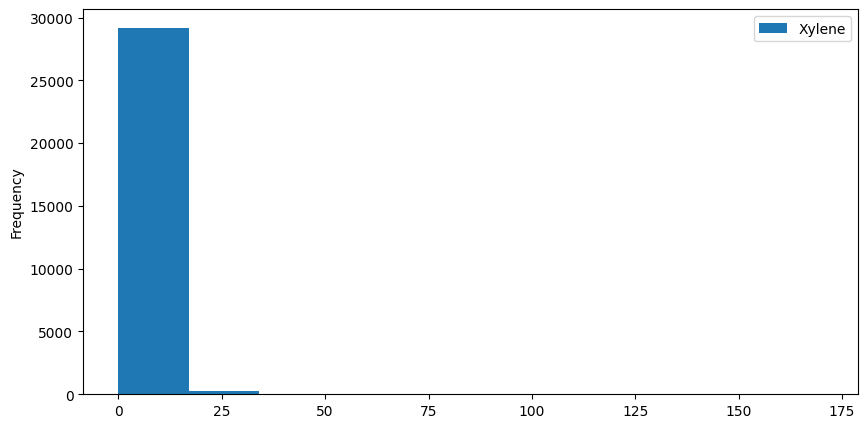

In [34]:
#Univariate analysis
df['Xylene'].plot(kind='hist', figsize=(10,5))
plt.legend()
plt.show()

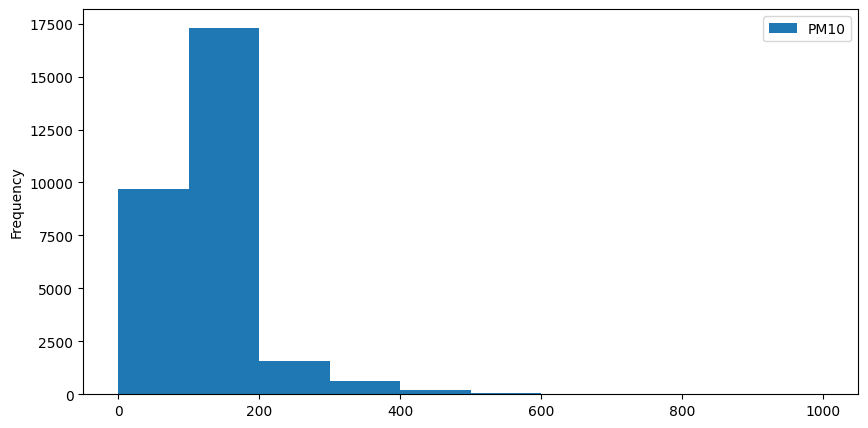

In [35]:
df['PM10'].plot(kind='hist', figsize=(10,5))
plt.legend()
plt.show()

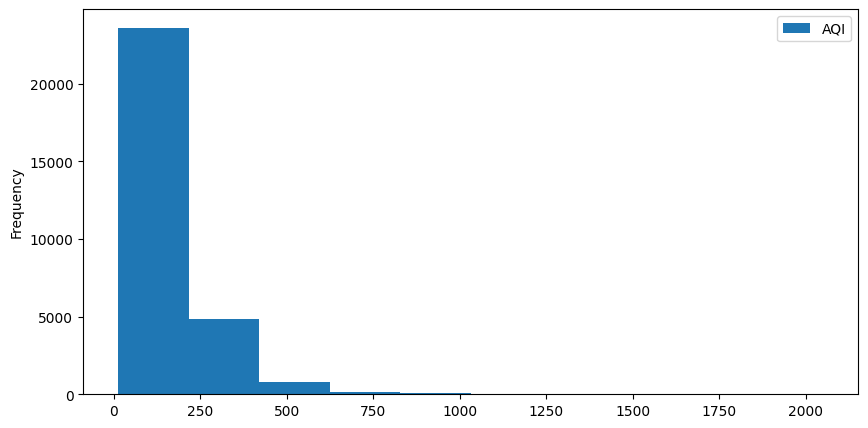

In [36]:

df['AQI'].plot(kind='hist', figsize=(10,5))
plt.legend()
plt.show()

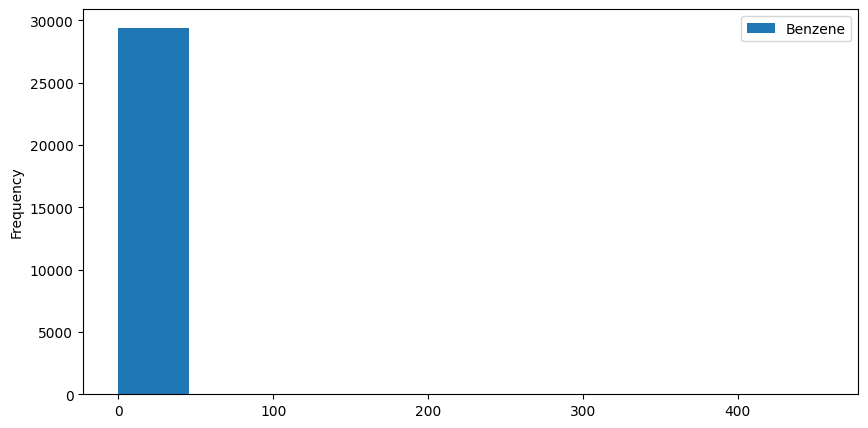

In [38]:
df['Benzene'].plot(kind='hist', figsize=(10,5))
plt.legend()
plt.show()

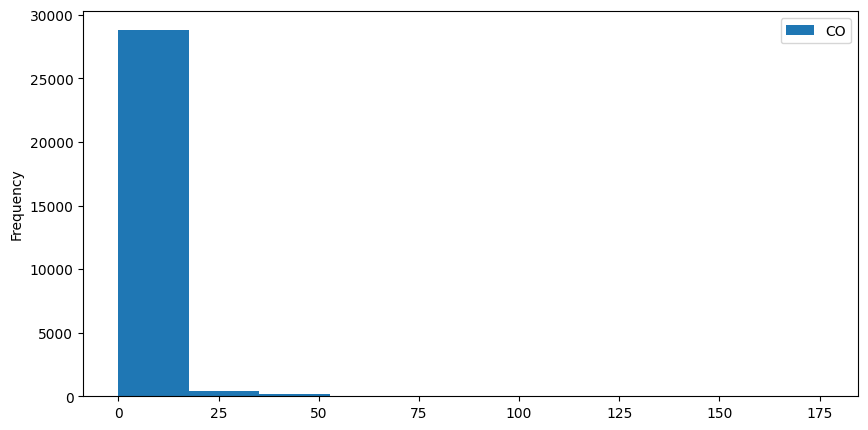

In [39]:
df['CO'].plot(kind='hist', figsize=(10,5))
plt.legend()
plt.show()

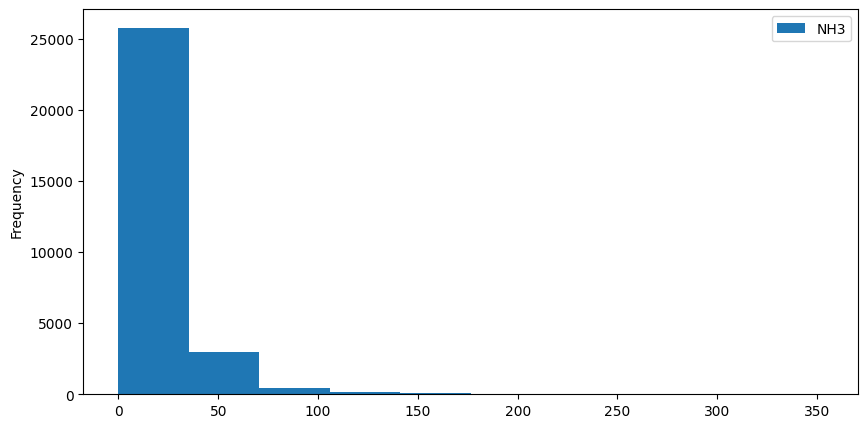

In [41]:
df['NH3'].plot(kind='hist', figsize=(10,5))
plt.legend()
plt.show()

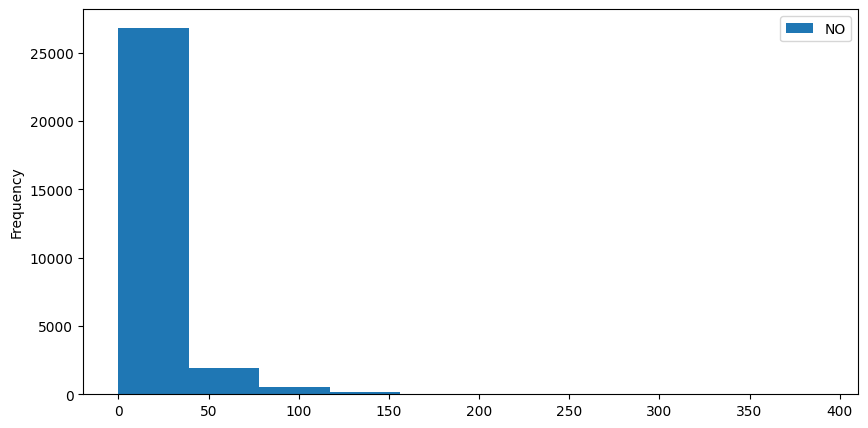

In [42]:
df['NO'].plot(kind='hist', figsize=(10,5))
plt.legend()
plt.show()

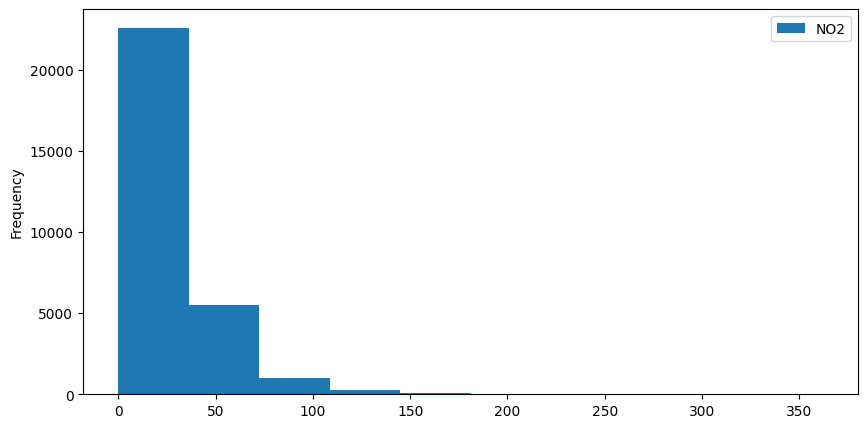

In [43]:
df['NO2'].plot(kind='hist', figsize=(10,5))
plt.legend()
plt.show()

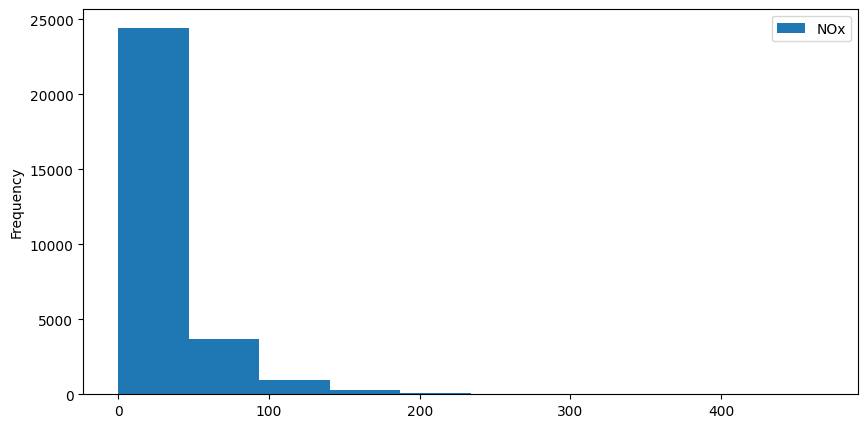

In [44]:
df['NOx'].plot(kind='hist', figsize=(10,5))
plt.legend()
plt.show()

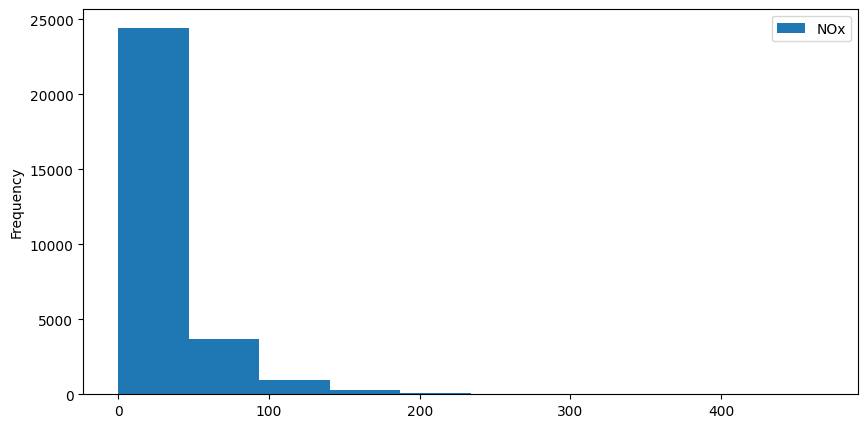

In [45]:
df['NOx'].plot(kind='hist', figsize=(10,5))
plt.legend()
plt.show()

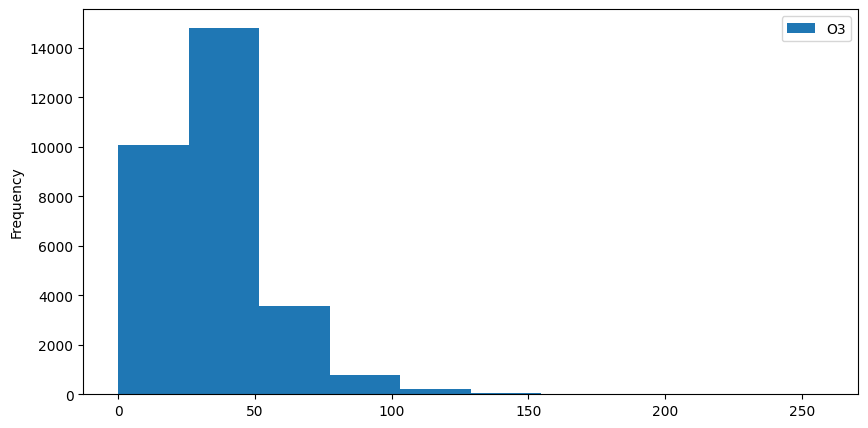

In [46]:
df['O3'].plot(kind='hist', figsize=(10,5))
plt.legend()
plt.show()

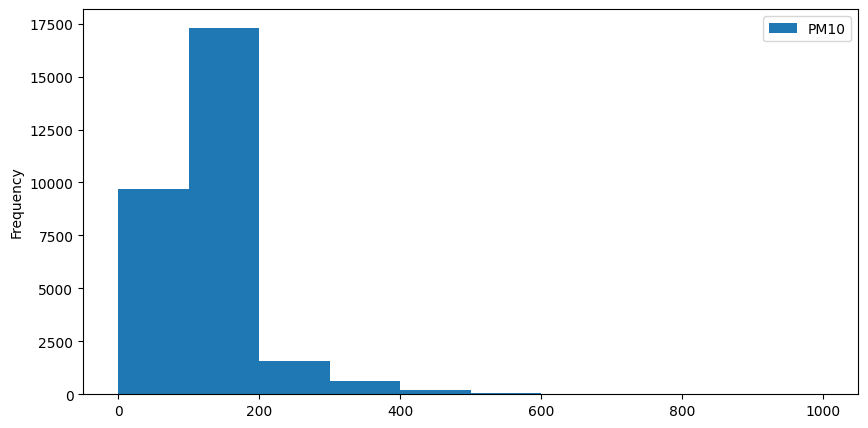

In [47]:
df['PM10'].plot(kind='hist', figsize=(10,5))
plt.legend()
plt.show()

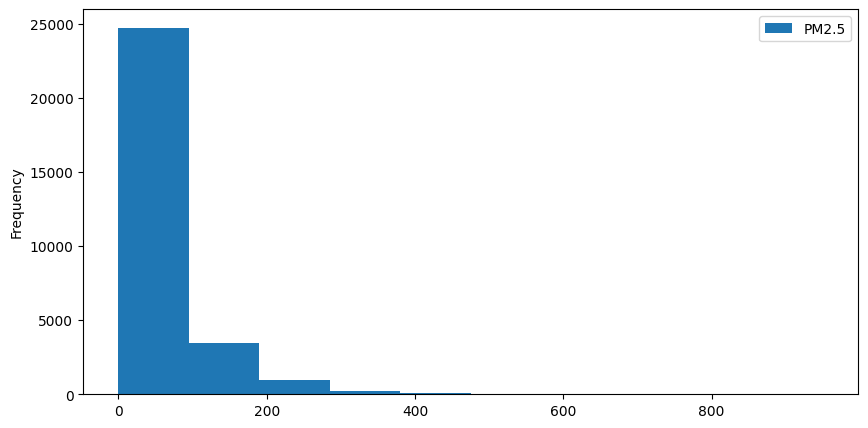

In [48]:
df['PM2.5'].plot(kind='hist', figsize=(10,5))
plt.legend()
plt.show()

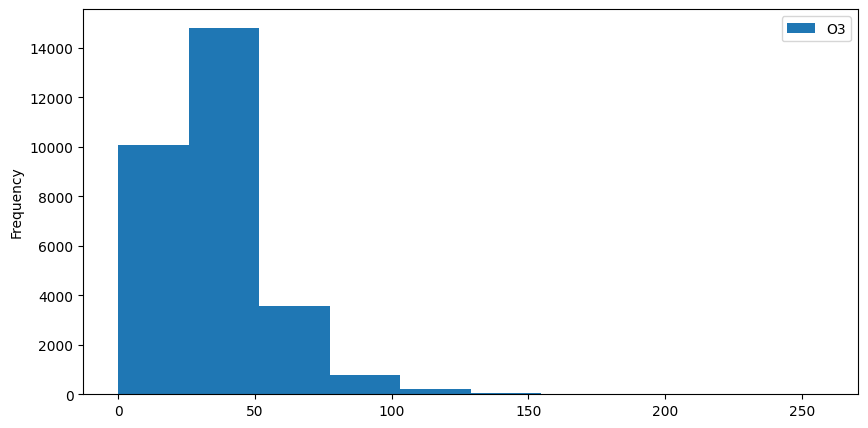

In [49]:
df['O3'].plot(kind='hist', figsize=(10,5))
plt.legend()
plt.show()

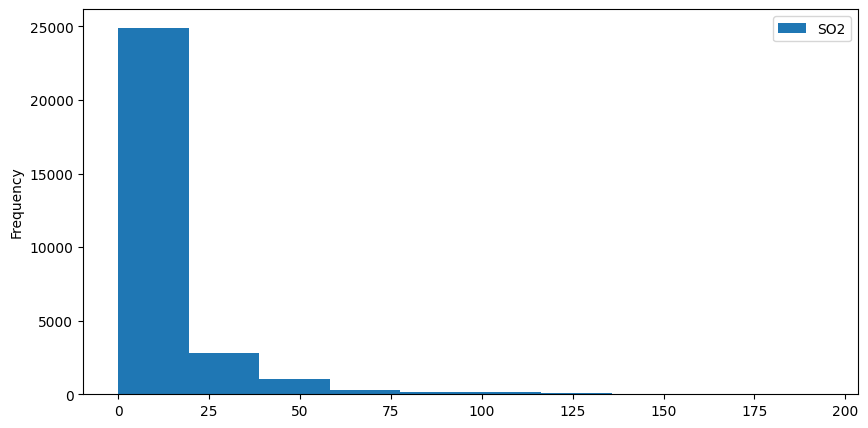

In [50]:
df['SO2'].plot(kind='hist', figsize=(10,5))
plt.legend()
plt.show()

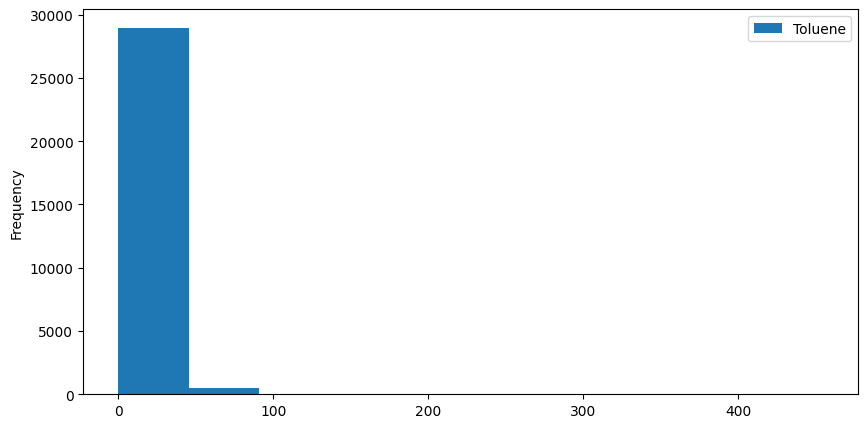

In [51]:
df['Toluene'].plot(kind='hist', figsize=(10,5))
plt.legend()
plt.show()

## Distribution of AQI from 2015 to 2020

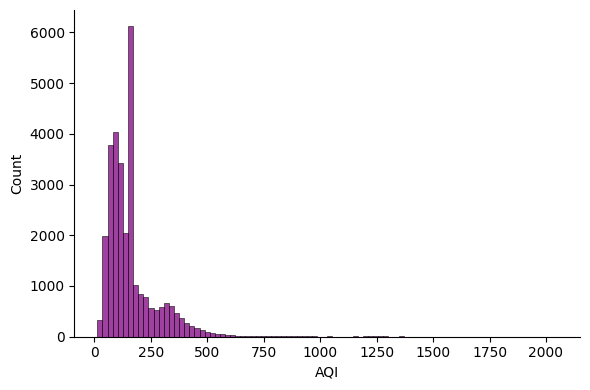

In [60]:
sns.displot(df, x='AQI', color='purple',bins=90,  height=4, aspect=1.5)
plt.show()

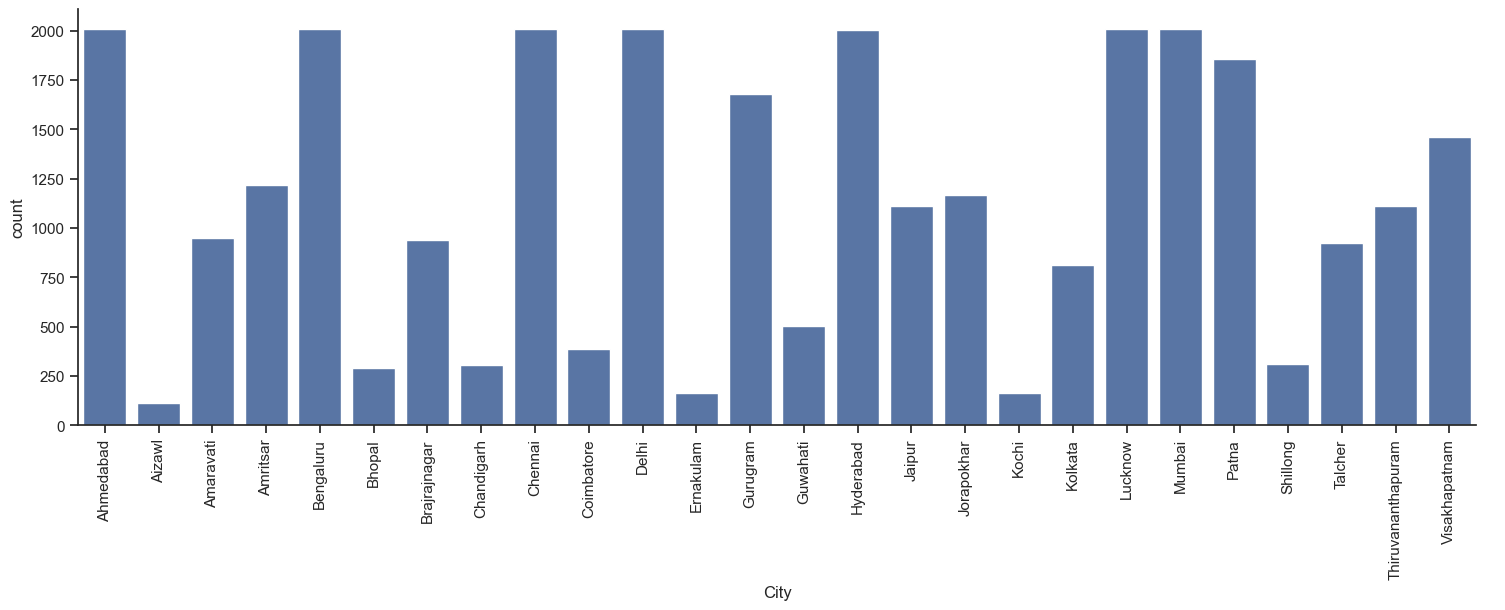

In [65]:
#Bivariate 
sns.set_theme(style='ticks')
graph= sns.catplot(x="City", kind='count', data=df, height=5, aspect=3)
graph.set_xticklabels(rotation=90)

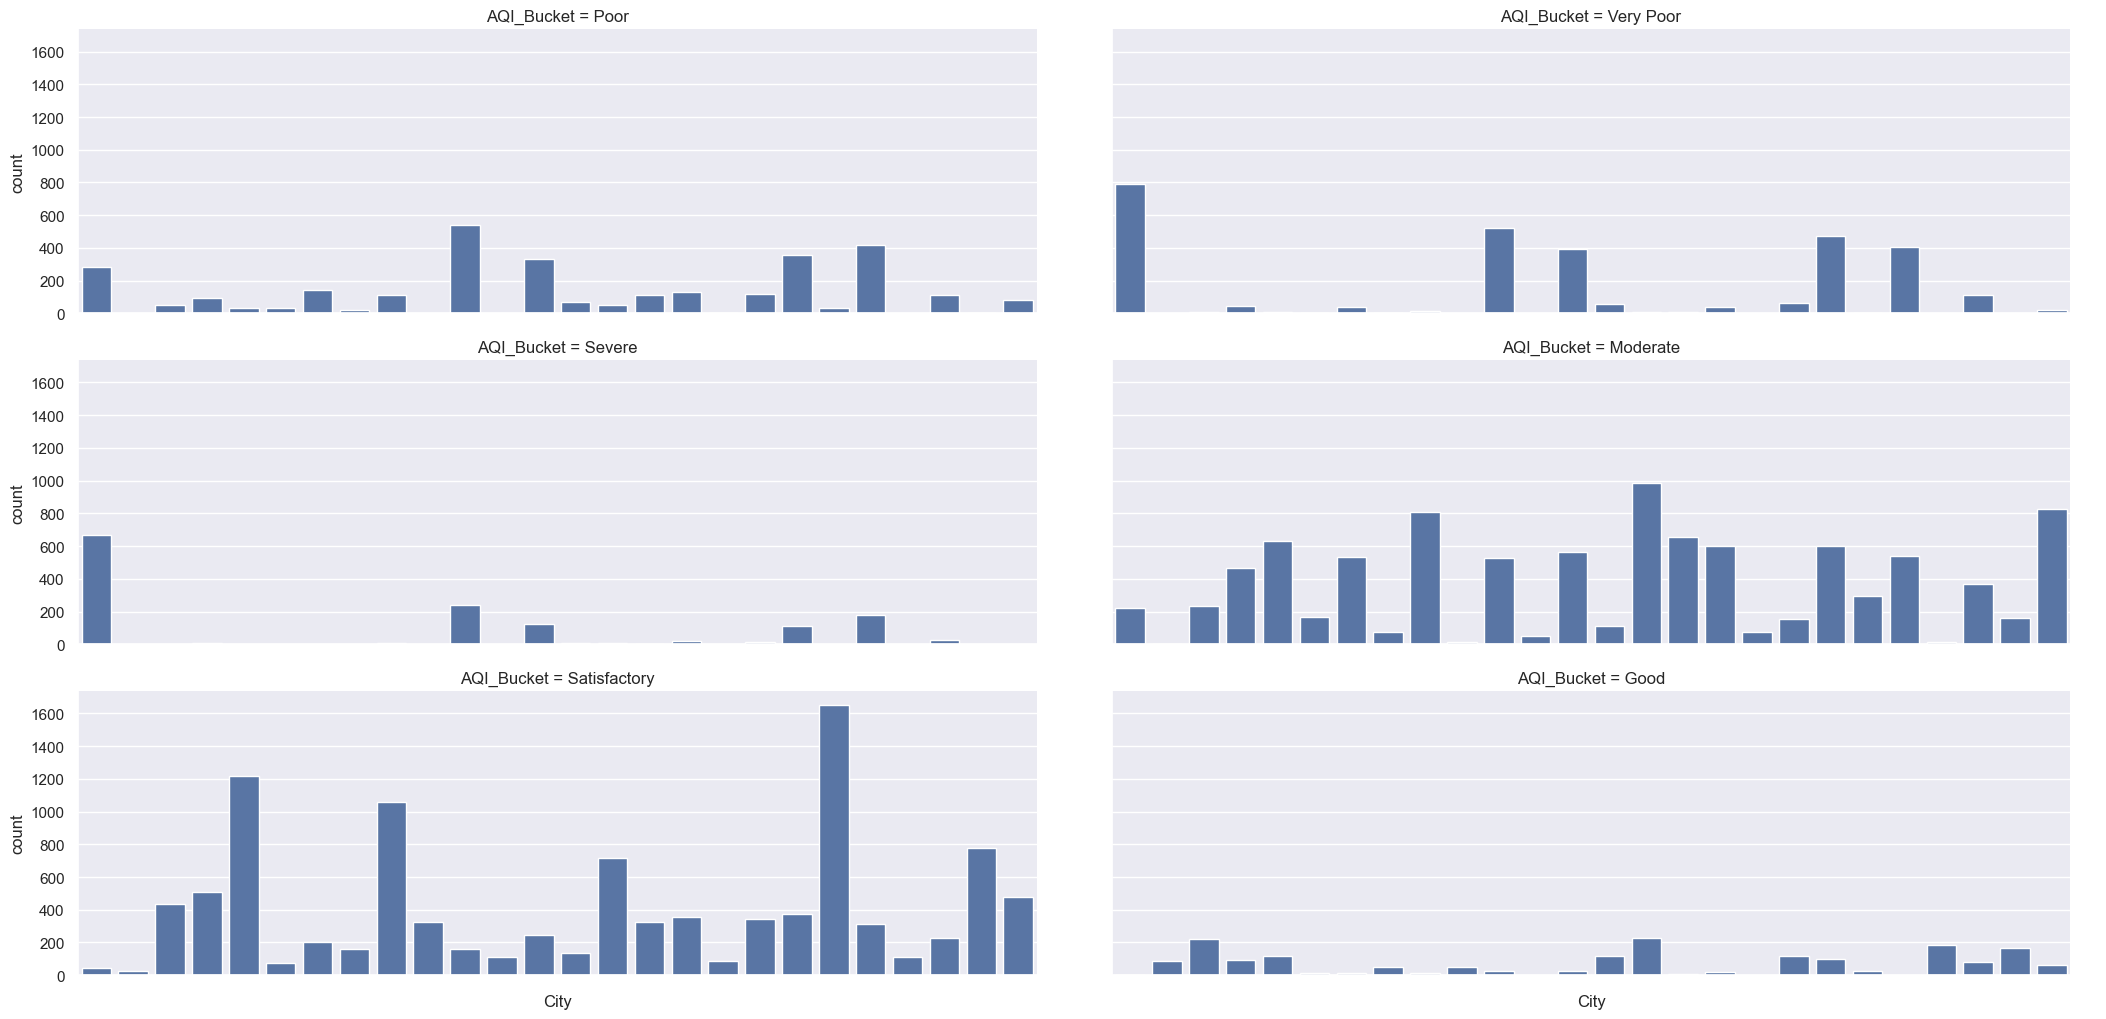

In [77]:
sns.set_theme(style='darkgrid')
graph= sns.catplot(x="City", kind='count', data= df, col='AQI_Bucket', col_wrap=2,
                   height=3.5, aspect=3)
graph.set_xticklabels(rotation=90)

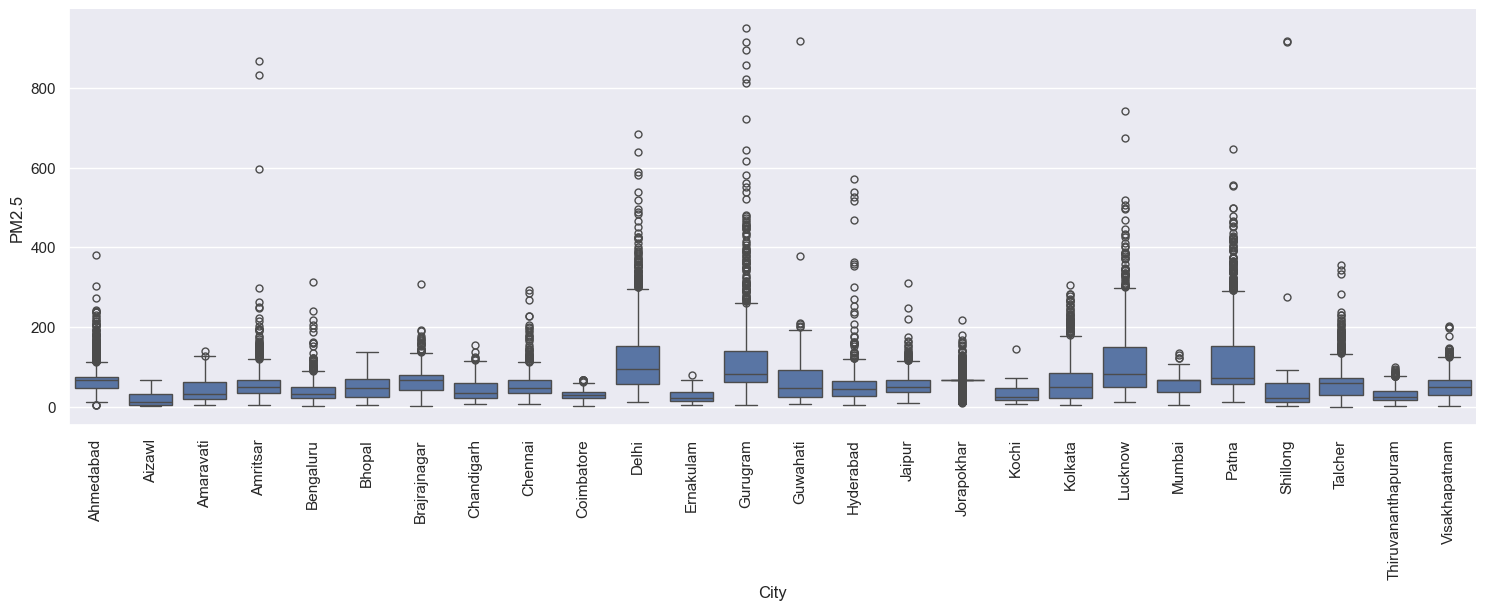

In [78]:
graph1= sns.catplot(x='City', y='PM2.5', kind='box', data=df, height=5, aspect=3)
graph1.set_xticklabels(rotation = 90)

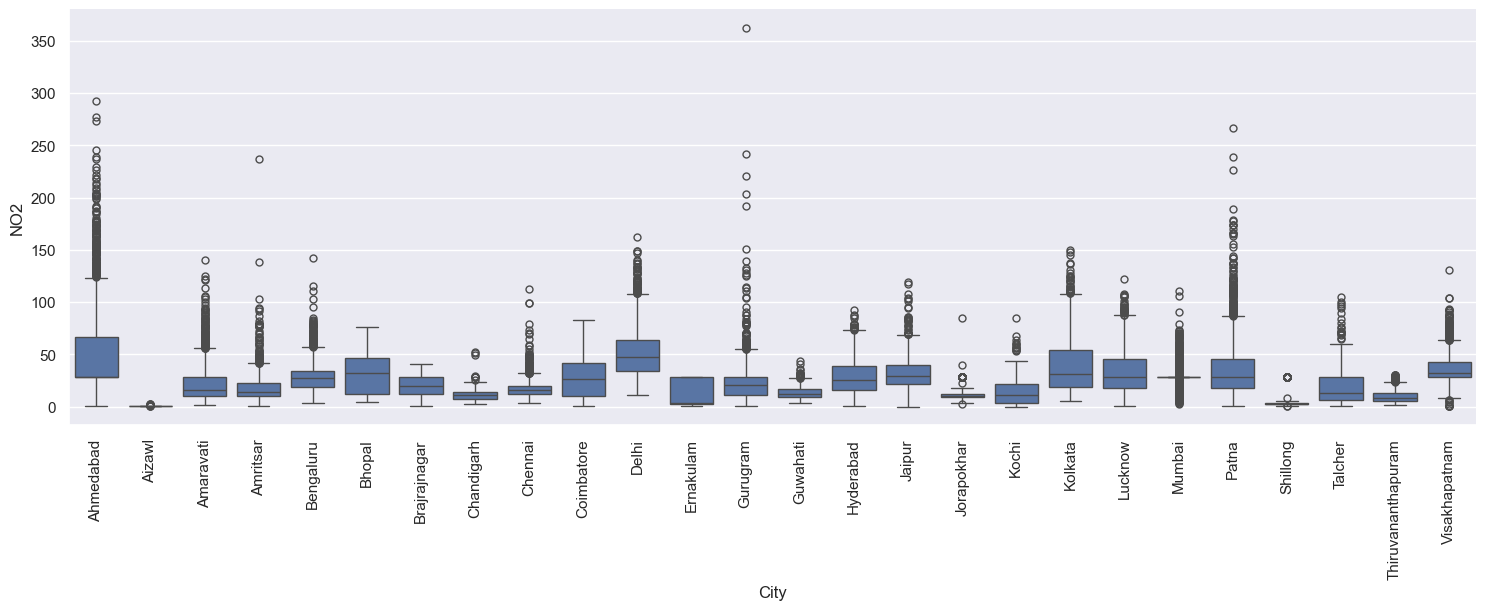

In [79]:
graph2= sns.catplot(x='City', y='NO2', kind='box', data=df, height=5, aspect=3)
graph2.set_xticklabels(rotation=90)

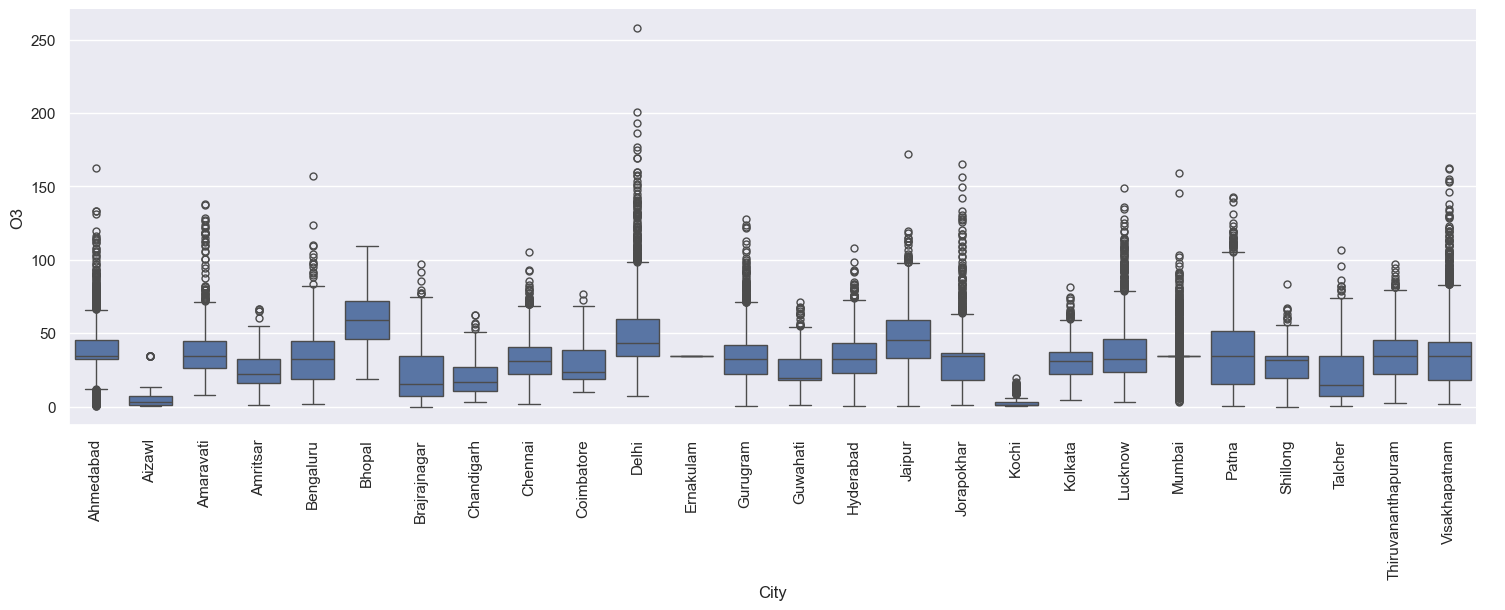

In [80]:
graph2= sns.catplot(x='City', y='O3', kind='box', data=df, height=5, aspect=3)
graph2.set_xticklabels(rotation=90)

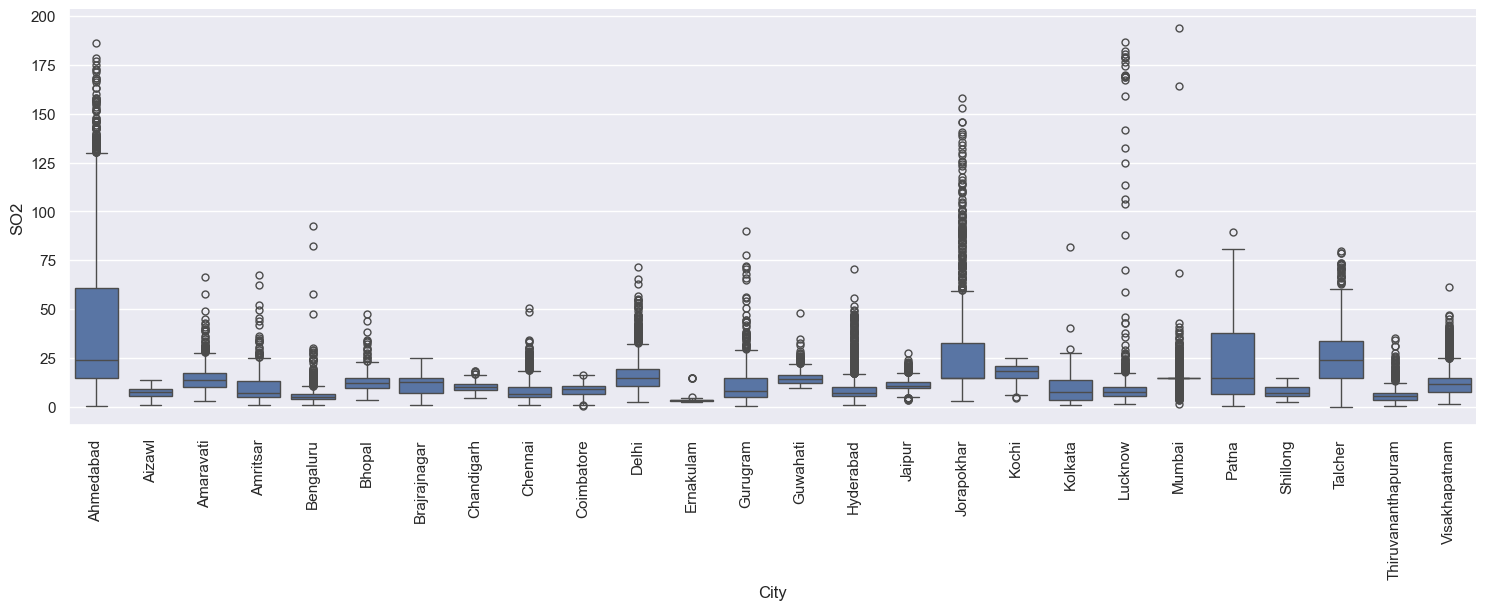

In [81]:
graph2= sns.catplot(x='City', y='SO2', kind='box', data=df, height=5, aspect=3)
graph2.set_xticklabels(rotation=90)

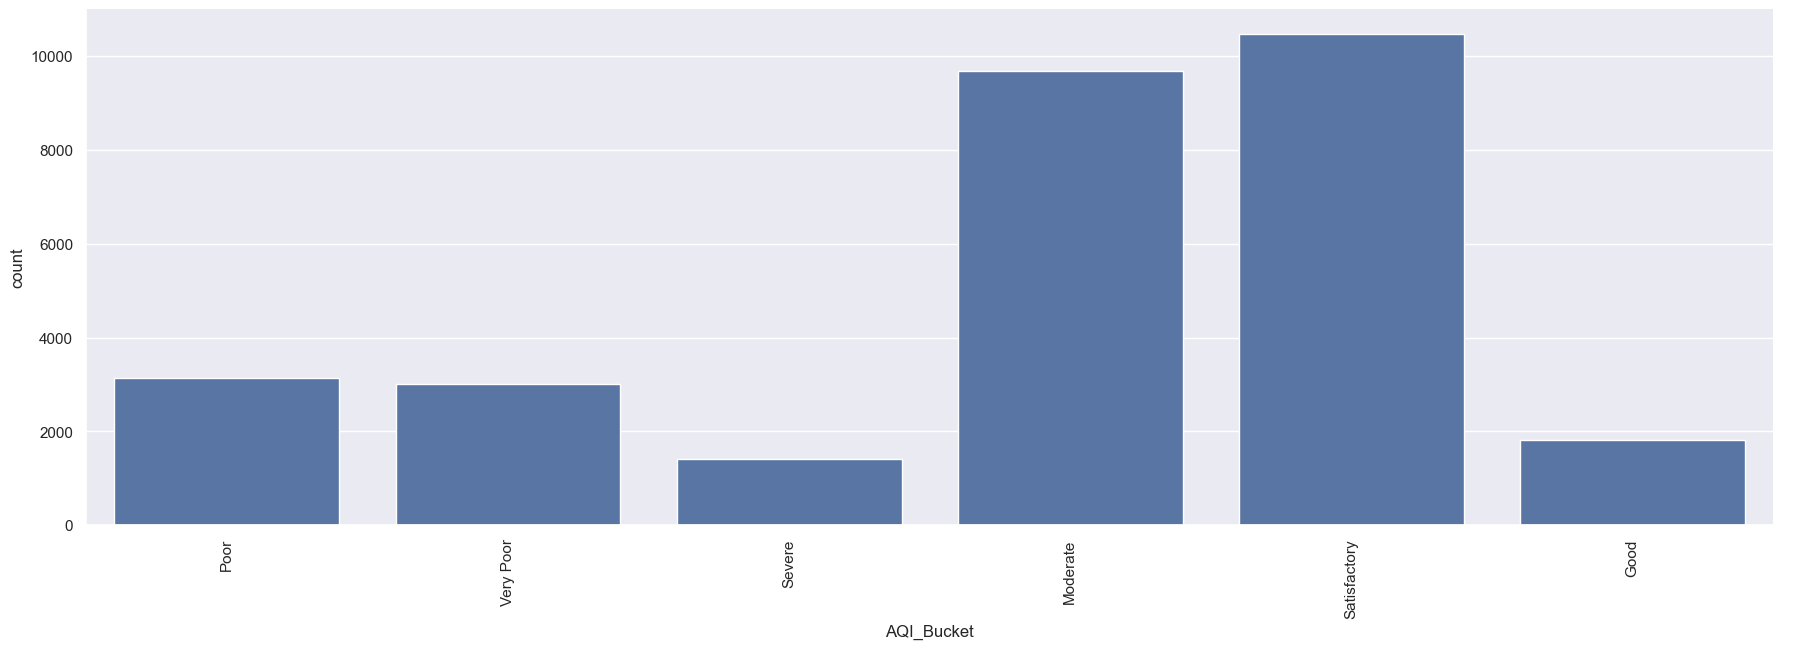

In [83]:
graph2= sns.catplot(x='AQI_Bucket', kind='count', data=df, height=6, aspect=3)
graph2.set_xticklabels(rotation=90)

In [84]:
# To check the null values 
df.isnull().sum().sort_values(ascending=False)

City          0
Date          0
PM2.5         0
PM10          0
NO            0
NO2           0
NOx           0
NH3           0
CO            0
SO2           0
O3            0
Benzene       0
Toluene       0
Xylene        0
AQI           0
AQI_Bucket    0
dtype: int64

In [85]:
df.describe().loc['mean']

PM2.5       67.450578
PM10       118.127103
NO          17.574730
NO2         28.560659
NOx         32.309123
NH3         23.483476
CO           2.248598
SO2         14.531977
O3          34.491430
Benzene      3.280840
Toluene      8.700972
Xylene       3.070128
AQI        166.463581
Name: mean, dtype: float64

In [86]:
df= df.replace({
    "PM2.5":{np.nan:"67.450578"},
    "PM10":{np.nan:"118.127103"},
    "NO":{np.nan:"17.574730"},
    "NO2":{np.nan:"28.560659"},
    "NOx":{np.nan:"32.309123"},
    "NH3":{np.nan:"23.483476"},
    "CO":{np.nan:"2.248598"},
    "SO2":{np.nan:"14.531977"},
    "O3":{np.nan:"34.491430"},
    "Benzene":{np.nan:"3.280840"},
    "Toluene":{np.nan:"8.700972"},
    "Xylene":{np.nan:"3.070128"},
    "AQI":{np.nan:"166.463581"}
})

In [87]:
df.isnull().sum()

City          0
Date          0
PM2.5         0
PM10          0
NO            0
NO2           0
NOx           0
NH3           0
CO            0
SO2           0
O3            0
Benzene       0
Toluene       0
Xylene        0
AQI           0
AQI_Bucket    0
dtype: int64

In [89]:
df=df.drop(['AQI_Bucket'],axis=1)

In [90]:
df.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
0,Ahmedabad,2015-01-01,67.450578,118.127103,0.92,18.22,17.15,23.483476,0.92,27.64,133.36,0.00,0.02,0.00,166.463581
1,Ahmedabad,2015-01-02,67.450578,118.127103,0.97,15.69,16.46,23.483476,0.97,24.55,34.06,3.68,5.50,3.77,166.463581
2,Ahmedabad,2015-01-03,67.450578,118.127103,17.40,19.30,29.70,23.483476,17.40,29.07,30.70,6.80,16.40,2.25,166.463581
3,Ahmedabad,2015-01-04,67.450578,118.127103,1.70,18.48,17.97,23.483476,1.70,18.59,36.08,4.43,10.14,1.00,166.463581
4,Ahmedabad,2015-01-05,67.450578,118.127103,22.10,21.42,37.76,23.483476,22.10,39.33,39.31,7.01,18.89,2.78,166.463581


<Axes: >

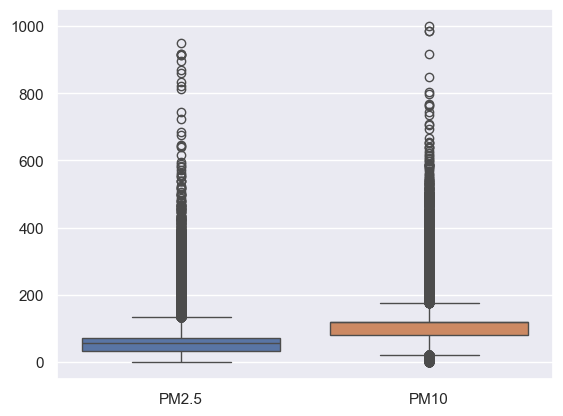

In [93]:
sns.boxplot(data=df[['PM2.5', 'PM10']])

<Axes: >

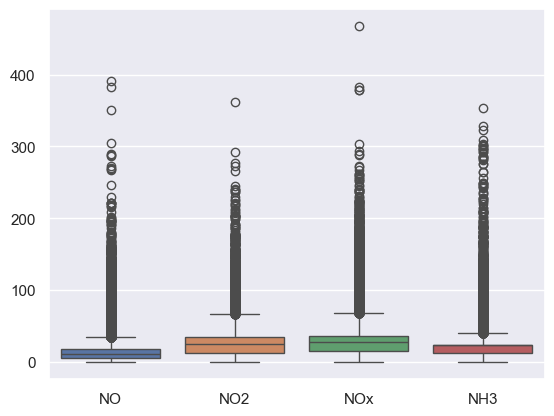

In [94]:
sns.boxplot(data=df[['NO', 'NO2', 'NOx', 'NH3']])


<Axes: >

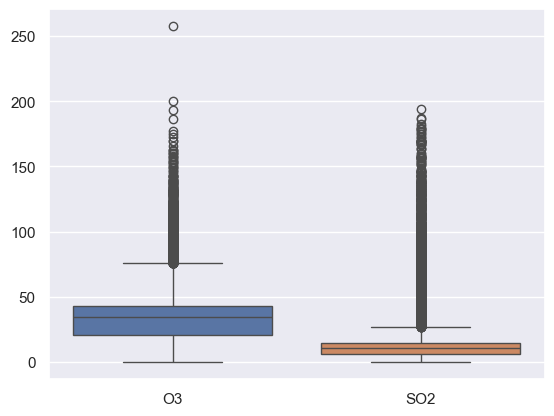

In [95]:
sns.boxplot(data=df[['O3', 'SO2']])

In [96]:
# IQR Method- Q3 Q1
def replace_outliers(df):
    for column in df.select_dtypes(include=['number']).columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR= Q3- Q1
        lb= Q1 - 1.5 *IQR
        ub= Q3 + 1.5 *IQR
        df[column]= df[column].apply(
            lambda x: Q1 if x < lb else (Q3 if x> ub else x)
        )
    return df


In [97]:
df= replace_outliers(df)

In [98]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
PM2.5,29531.0,54.524525,26.612577,0.04,32.1500,58.030000,72.450000,132.89
PM10,29531.0,102.030795,32.523348,21.10,79.3175,118.127103,118.127103,176.31
NO,29531.0,12.388832,7.447480,0.02,6.2100,11.530000,17.574730,34.62
NO2,29531.0,25.048606,14.331122,0.01,12.9800,25.240000,34.662500,67.18
NOx,29531.0,26.101188,14.719395,0.00,14.6700,27.550000,36.012500,68.02
NH3,29531.0,19.220063,8.513774,0.01,12.0400,23.483476,23.483476,40.64
CO,29531.0,1.086089,0.734771,0.00,0.5400,0.950000,1.710000,3.46
SO2,29531.0,10.654863,5.372107,0.01,6.0900,10.480000,14.531977,27.19
O3,29531.0,32.399748,15.602464,0.01,20.7400,34.491430,42.730000,75.71
Benzene,29531.0,2.005608,1.759115,0.00,0.2400,1.840000,3.280840,7.84


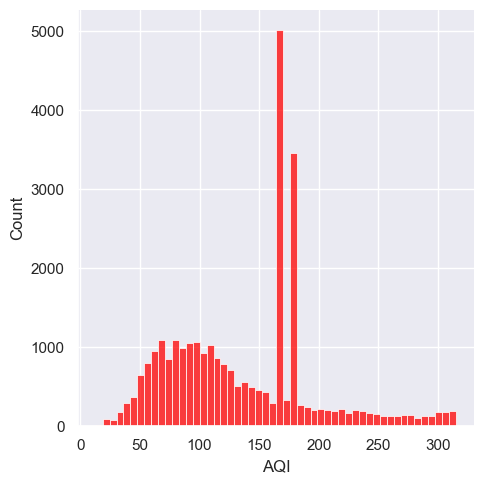

In [99]:
sns.displot(df, x='AQI', color='red')
plt.show()

In [102]:
df1= df.drop(columns=['City'])

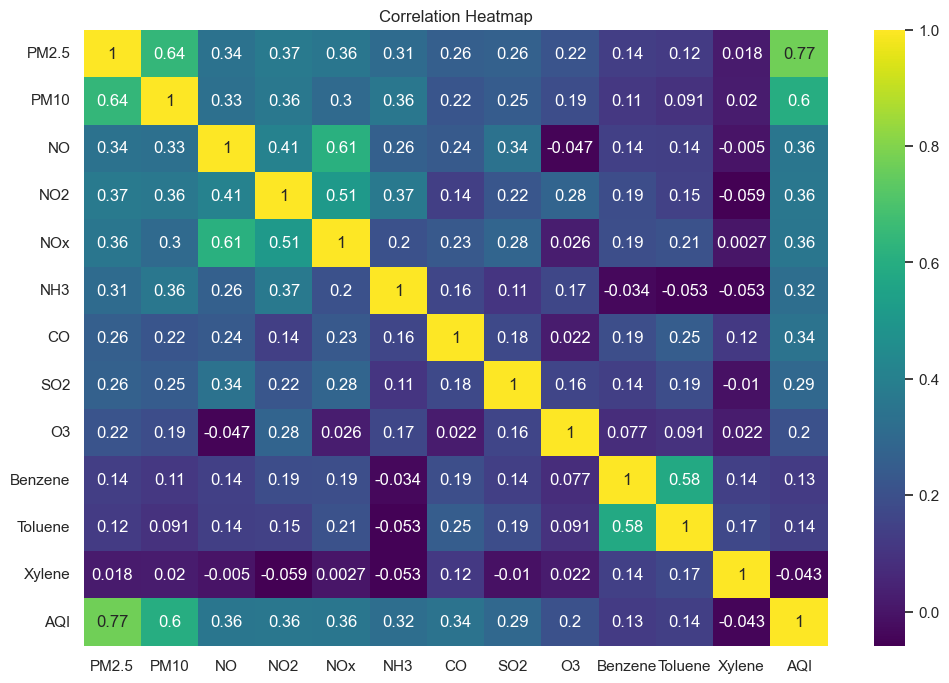

In [111]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns from df1
numeric_df = df1.select_dtypes(include='number')

plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='viridis')
plt.title('Correlation Heatmap')
plt.show()



# Data modeling

In [121]:
df.drop(['Date', 'City'], axis=1, inplace=True, errors='ignore')
df.head()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
0,67.450578,118.127103,0.92,18.22,17.15,23.483476,0.92,14.531977,42.73,0.00,0.02,2.00,166.463581
1,67.450578,118.127103,0.97,15.69,16.46,23.483476,0.97,24.550000,34.06,3.68,5.50,3.77,166.463581
2,67.450578,118.127103,17.40,19.30,29.70,23.483476,1.71,14.531977,30.70,6.80,16.40,2.25,166.463581
3,67.450578,118.127103,1.70,18.48,17.97,23.483476,1.70,18.590000,36.08,4.43,10.14,1.00,166.463581
4,67.450578,118.127103,22.10,21.42,37.76,23.483476,1.71,14.531977,39.31,7.01,18.89,2.78,166.463581


# Scaling - Standard SCaler

In [122]:
from sklearn.preprocessing import StandardScaler
df1= StandardScaler().fit_transform(df)
df1

array([[ 0.4857204 ,  0.49492384, -1.53998746, ..., -1.31601976,
        -0.94218787,  0.46736947],
       [ 0.4857204 ,  0.49492384, -1.53327367, ..., -0.04520555,
         1.45921525,  0.46736947],
       [ 0.4857204 ,  0.49492384,  0.67287904, ...,  2.48250882,
        -0.60300664,  0.46736947],
       ...,
       [-1.18797442, -1.1161646 , -1.20026949, ..., -1.31833876,
        -0.94218787, -1.14797364],
       [-1.4235813 , -1.60074776, -1.11970396, ..., -1.32065776,
        -0.94218787, -1.37765047],
       [-1.48520734, -1.10786273, -1.60981092, ...,  0.69710116,
         0.50968122, -1.44327243]], shape=(29531, 13))

In [123]:
df= pd.DataFrame(df1, columns=df.columns)
df.head()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
0,0.48572,0.494924,-1.539987,-0.476496,-0.608132,0.500775,-0.226045,0.721724,0.662102,-1.140142,-1.316020,-0.942188,0.467369
1,0.48572,0.494924,-1.533274,-0.653038,-0.655010,0.500775,-0.157996,2.586578,0.106411,0.951854,-0.045206,1.459215,0.467369
2,0.48572,0.494924,0.672879,-0.401134,0.244499,0.500775,0.849138,0.721724,-0.108943,2.725503,2.482509,-0.603007,0.467369
3,0.48572,0.494924,-1.435252,-0.458353,-0.552423,0.500775,0.835528,1.477125,0.235880,1.378212,1.030812,-2.298913,0.467369
4,0.48572,0.494924,1.303976,-0.253202,0.792085,0.500775,0.849138,0.721724,0.442902,2.844883,3.059941,0.116058,0.467369


In [124]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score


In [125]:
df.columns

Index(['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3',
       'Benzene', 'Toluene', 'Xylene', 'AQI'],
      dtype='object')

In [127]:
# Feature & Target Selection
X= df[['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3',
       'Benzene', 'Toluene', 'Xylene']]
Y= df['AQI']

In [128]:
X.head()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene
0,0.48572,0.494924,-1.539987,-0.476496,-0.608132,0.500775,-0.226045,0.721724,0.662102,-1.140142,-1.316020,-0.942188
1,0.48572,0.494924,-1.533274,-0.653038,-0.655010,0.500775,-0.157996,2.586578,0.106411,0.951854,-0.045206,1.459215
2,0.48572,0.494924,0.672879,-0.401134,0.244499,0.500775,0.849138,0.721724,-0.108943,2.725503,2.482509,-0.603007
3,0.48572,0.494924,-1.435252,-0.458353,-0.552423,0.500775,0.835528,1.477125,0.235880,1.378212,1.030812,-2.298913
4,0.48572,0.494924,1.303976,-0.253202,0.792085,0.500775,0.849138,0.721724,0.442902,2.844883,3.059941,0.116058


In [129]:
Y.head()

0    0.467369
1    0.467369
2    0.467369
3    0.467369
4    0.467369
Name: AQI, dtype: float64

In [ ]:
# Split the dataset into train and test   Train -80% test- 20%
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test= train_test_split(X,Y,test_size= 0.2, random_state=42)
print('Shape of X_train: ', X_train)
print("Shape of X_test: ", X_test)
print("Shape of Y_train: ", Y_train)
print("shape of y_test: ", Y_test)

Shape of X_train:            PM2.5      PM10        NO       NO2       NOx       NH3        CO  \
6688   0.673583  0.494924  0.633939  0.612063  1.685479 -1.106468  0.849138   
29333  0.792326  0.612162 -1.267407  0.138260 -0.633270 -0.387621  0.046153   
27996 -1.484832 -2.287036 -1.227125 -1.190339 -1.113596 -1.551637 -0.824881   
26848  0.485720  0.494924  0.696341  0.245069  0.421759  0.500775  1.582165   
21186 -1.422830  0.494924 -0.664509  0.205946 -0.157019  1.128771 -0.362144   
...         ...       ...       ...       ...       ...       ...       ...   
21575 -1.231564  0.494924 -0.593343 -0.447189 -0.669957 -2.020297 -0.239655   
5390  -0.618685 -0.845278 -0.332847  1.198907 -0.236507  0.500775 -0.062726   
860    0.485720  0.494924  0.696341  0.245069  0.421759  0.500775  1.582165   
15795 -0.693087 -0.190967 -0.902177  0.429938 -0.499430 -0.455747 -0.525463   
23654  0.404533  0.605397  1.555072  0.783720  2.275187  1.810032 -0.103556   

            SO2        O3   Benz

In [133]:
print('Shape of X_train: ', X_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of Y_train: ", Y_train.shape)
print("shape of y_test: ", Y_test.shape)

Shape of X_train:  (23624, 12)
Shape of X_test:  (5907, 12)
Shape of Y_train:  (23624,)
shape of y_test:  (5907,)


#### linear reression

In [135]:
# Linear regression model
LR= LinearRegression()
LR.fit(X_train, Y_train)

LinearRegression()

In [142]:
# Predicting the values
train_pred= LR.predict(X_train)  # Predicting traiin
test_pred= LR.predict(X_test)  # Predicting test



# Evaluation for linear regression
RMSE_train= (np.sqrt(mean_squared_error(Y_train, train_pred)))
RMSE_test= (np.sqrt(mean_squared_error(Y_test, test_pred)))
print("RMSE Training data= ", str(RMSE_train))
print("RMSE Test data = ", str(RMSE_test))
print('-'*60)
print("R Squared value of train= ", LR.score(X_train, Y_train))
print("R Squared value of test= ", LR.score(X_test, Y_test))

RMSE Training data=  0.5925281309756005
RMSE Test data =  0.5918185602103431
------------------------------------------------------------
R Squared value of train=  0.6516570626791713
R Squared value of test=  0.6382528259491942


#### KNN

In [140]:
# KNN
knn= KNeighborsRegressor()
knn.fit(X_train, Y_train)

KNeighborsRegressor()

In [ ]:
# Predicting the values
train_pred= knn.predict(X_train)  # Predicting traiin
test_pred= knn.predict(X_test)  # Predicting test


# Evaluation for KNN
RMSE_train= (np.sqrt(mean_squared_error(Y_train, train_pred)))
RMSE_test= (np.sqrt(mean_squared_error(Y_test, test_pred)))
print("RMSE Training data= ", str(RMSE_train))
print("RMSE Test data = ", str(RMSE_test))
print('-'*60)
print("R Squared value of train= ", knn.score(X_train, Y_train))
print("R Squared value of test= ", knn.score(X_test, Y_test))


RMSE Training data=  0.4266309062618867
RMSE Test data =  0.5317436143511349
------------------------------------------------------------
R Squared value of train=  0.8194100035997104
R Squared value of test=  0.7079665821022538


### Decision tree

In [145]:
dtr= DecisionTreeRegressor()
dtr.fit(X_train, Y_train)

DecisionTreeRegressor()

In [ ]:
# Predicting the values
train_pred= dtr.predict(X_train)  # Predicting traiin
test_pred= dtr.predict(X_test)  # Predicting test


# Evaluation for Decision tree
RMSE_train= (np.sqrt(mean_squared_error(Y_train, train_pred)))
RMSE_test= (np.sqrt(mean_squared_error(Y_test, test_pred)))
print("RMSE Training data= ", str(RMSE_train))
print("RMSE Test data = ", str(RMSE_test))
print('-'*60)
print("R Squared value of train= ", dtr.score(X_train, Y_train))
print("R Squared value of test= ", dtr.score(X_test, Y_test))


RMSE Training data=  0.0566964909024074
RMSE Test data =  0.6657743718945862
------------------------------------------------------------
R Squared value of train=  0.9968106555761662
R Squared value of test=  0.5421933128987563


#### Random forest Regressor

In [147]:
rfr= RandomForestRegressor()
rfr.fit(X_train, Y_train)

RandomForestRegressor()

In [148]:
# Predicting the values
train_pred= rfr.predict(X_train)  # Predicting traiin
test_pred= rfr.predict(X_test)  # Predicting test


# Evaluation for Randm forest
RMSE_train= (np.sqrt(mean_squared_error(Y_train, train_pred)))
RMSE_test= (np.sqrt(mean_squared_error(Y_test, test_pred)))
print("RMSE Training data= ", str(RMSE_train))
print("RMSE Test data = ", str(RMSE_test))
print('-'*60)
print("R Squared value of train= ", rfr.score(X_train, Y_train))
print("R Squared value of test= ", rfr.score(X_test, Y_test))


RMSE Training data=  0.1854953318963985
RMSE Test data =  0.48275948439999267
------------------------------------------------------------
R Squared value of train=  0.9658606670173895
R Squared value of test=  0.7592925043162967
